# Homework - 2
***
**Name**: Ryan Leonard
***

This assignment is due on Canvas by **5pm on Friday October 5th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Boosting - Extra Credit [5-points]
***

In this problem, we slightly modify the AdaBoost algorithm to better explore some properties of the algorithm. Specifically, we no longer normalize the weights on the training examples after each iteration. The modified algorithm, which is set to run for $T$ iterations, is shown in Algorithm I.

Note that in the modified version, the weights associated with the training examples are no longer guaranteed to sum to one after each iteration (and therefore can not be viewed as a "distribution"), but the algorithm is still valid. Let us denote the sum of weights at the start of iteration $t$ by $Z_t = \sum_{i=1}^{n}w_t^{(t)}$. At the start of the first iteration of boosting, $Z_1 = n$. Let us now investigate the behavior of $Z_t$, as a function of t

![image](fig-1.png)

**A:** At the $t^{th}$ iteration, we found a weak classifier that achieves a weighted training error $\epsilon_t$. Show that the choice, $\alpha_t = \frac{1}{2}\log\frac{1 - \epsilon_t}{\epsilon_t}$ is the optimal in the sense that it minimizes $Z_{t+1}$

*Hint: Look at $Z_{t+1}$ as function of $\alpha$ and find the value of $\alpha$ for which the function achieves the minimum. You may also find the following notational shorthand useful:

$$W_t = \sum_{i=1}^{n}w_i^{(t)}(1 - \delta(y_i, h_t(x_i)))$$
$$W_c = \sum_{i=1}^{n}w_i^{(t)}(\delta(y_i, h_t(x_i)))$$

where $W_c$ is the total weight of the points classified correctly by $h_t$ and $W_t$ is the total weight of the misclassified points. $\delta(y, h_t(x)) = 1$ whenever the label predicted by $h_t$ is correct and zero otherwise. The weights here are those available at the start of iteration $t$

**A Solution:**


We begin by evaluation Z_t.
By definition, we have $Z_t = \sum_{i=1}^{n}w_t^{(t)}$
\begin{align*}
Z_t &= \sum_{i=1}^{n}w_t^{(t)}\\
Z_t &= W_t + W_c\\
Z_{t+1} &= e^{-y_i \alpha_t h_t(x_i)}(W_t + W_c)\\
Z_{t+1} &= e^{\alpha_t}W_t + e^{-\alpha_t}W_c\\
\end{align*}
To find the optimal value W.R.T $\alpha$, we simply take the derivative and set it equal to 0.
\begin{align*}
\frac{\partial Z_{t+1}}{\partial \alpha} &= e^{\alpha_t}W_t - e^{-\alpha_t}W_c\\
0 &= e^{\alpha_t}W_t - e^{-\alpha_t}W_c\\
e^{\alpha_t}W_t &= \frac{W_c}{e^{\alpha_t}}\\
e^{2\alpha_t} &= \frac{W_c}{W_t}\\
\alpha_t &= \frac{1}{2}log\left( \frac{W_c}{W_t} \right)\\
\alpha_t &= \frac{1}{2}log\left( \frac{Z_t(1-\epsilon_t)}{Z_t\epsilon_t} \right)\\
\alpha_t &= \frac{1}{2}log\left( \frac{1-\epsilon_t}{\epsilon_t} \right)
\end{align*}
Where the last line is exactly the expression we were looking for!

**B:** Show that the sum of weights $Z_t$ is monotonically decreasing as a function of $t$.

If we look at the second and third steps from part a, this relationship is quite simple to see.
$$Z_t = W_t + W_c$$
$$Z_{t+1} = e^{-y_i \alpha_t h_t(x_i)}(W_t + W_c)$$
Specifically, we see that when $\alpha = 0$ then $Z_t == Z_{t+1}$. Moreover, we take note that the worst case error rate for a binary classifier is 0.5. This is helpful because $\alpha_t > 0; \forall \epsilon < 0.5$ and finally, note that $\epsilon$ is monotonically decreasing. 

Applying these observations to some math we get:
\begin{align*}
Z_{t+1} &= e^{\alpha_t}W_t + e^{-\alpha_t}W_c\\
Z_{t+1} &= e^{\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}W_t + e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}W_c\\
Z_{t+1} &= e^{\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}\epsilon + e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}(1-\epsilon)\\
Z_{t+1} &= e^{\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}\epsilon + e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}- e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}\epsilon\\
Z_{t+1} &= \epsilon(e^{\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}- e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}) + e^{-\frac{1}{2}log\left( \frac{1-\epsilon}{\epsilon}\right)}\\
Z_{t+1} &= \epsilon(\sqrt{\frac{1-\epsilon}{\epsilon}}- \sqrt{\frac{1-\epsilon}{\epsilon}} ^{-1}) + \sqrt{\frac{1-\epsilon}{\epsilon}} ^{-1}
\end{align*}


Where the epsilon multiplicative epsilon on the first term garuntees that it monotonically decreases for every timestep and the second term obviously decreases with every timestep.

## Training Data
***
Please do not change this class

In [21]:
import numpy as np
from sklearn.base import clone

In [22]:
class ThreesAndEights:
    """
    Class to store MNIST data
    """

    def __init__(self, location):

        import pickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        # Split the data set 
#         X_train, y_train, X_valid, y_valid = pickle.load(f)
        train_set, valid_set, test_set = pickle.load(f)
    
        X_train, y_train = train_set
        X_valid, y_valid = valid_set

        # Extract only 3's and 8's for training set 
        self.X_train = X_train[np.logical_or( y_train==3, y_train == 8), :]
        self.y_train = y_train[np.logical_or( y_train==3, y_train == 8)]
        self.y_train = np.array([1 if y == 8 else -1 for y in self.y_train])
        
        # Shuffle the training data 
        shuff = np.arange(self.X_train.shape[0])
        np.random.shuffle(shuff)
        self.X_train = self.X_train[shuff,:]
        self.y_train = self.y_train[shuff]

        # Extract only 3's and 8's for validation set 
        self.X_valid = X_valid[np.logical_or( y_valid==3, y_valid == 8), :]
        self.y_valid = y_valid[np.logical_or( y_valid==3, y_valid == 8)]
        self.y_valid = np.array([1 if y == 8 else -1 for y in self.y_valid])
        
        f.close()

In [23]:
data = ThreesAndEights("data/mnist.pklz")

Feel free to explore this data and get comfortable with it before proceeding further.

## Bagging
Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

Given a standard training set $D$ of size n, bagging generates $N$ new training sets $D_i$, roughly each of size n * ratio, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_i$ The $N$ models are fitted using the above $N$ bootstraped samples and combined by averaging the output (for regression) or voting (for classification). 

-Source [Wiki](https://en.wikipedia.org/wiki/Bootstrap_aggregating)

## Implementing Bagging [5-points]
***

We've given you a skeleton of the class `BaggingClassifier` below which will train a classifier based on the decision trees as implemented by sklearn. Your tasks are as follows, please approach step by step to understand the code flow:
* Implement `bootstrap` method which takes in two parameters (`X_train, y_train`) and returns a bootstrapped training set ($D_i$)
* Implement `fit` method which takes in two parameters (`X_train, y_train`) and trains `N` number of base models on different bootstrap samples. You should call `bootstrap` method to get bootstrapped training data for each of your base model
* Implement `voting` method which takes the predictions from learner trained on bootstrapped data points `y_hats` and returns final prediction as per majority rule. In case of ties, return either of the class randomly.
* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those. Please use the `voting` method to reach consensus on final prediction.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

class BaggingClassifier:
    def __init__(self, ratio = 0.20, N = 20, base=DecisionTreeClassifier(max_depth=4)):
        """
        Create a new BaggingClassifier
        
        Args:
            base (BaseEstimator, optional): Sklearn implementation of decision tree
            ratio: ratio of number of data points in subsampled data to the actual training data
            N: number of base estimator in the ensemble
        
        Attributes:
            base (estimator): Sklearn implementation of decision tree
            N: Number of decision trees
            learners: List of models trained on bootstrapped data sample
        """
        assert ratio <= 1.0, "Cannot have ratio greater than one"
        self.base = base
        self.ratio = ratio
        self.N = N
        self.learners = []
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        #TODO: Implement functionality to fit models on the bootstrapped samples
        # cloning sklearn models:
        # from sklearn.base import clone
        # h = clone(self.base)
        
        # Create n 'bags', train a classifier on each bag, and then append that classifier to learners.
        for i in range(self.N):
            h = clone(self.base, safe=False)
            D_x, D_y = self.boostrap(X_train, y_train)
            h.fit(D_x, D_y)
            self.learners.append(h)
        
    def boostrap(self, X_train, y_train):
        """
        Args:
            n (int): total size of the training data
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        # create a new training set of size ratio * n
        # sample with replacement, so just 
        D_x = []
        D_y = []
        for i in range(int(np.ceil(self.ratio * len(X_train)))):
            idx = np.random.randint(0, len(X_train))
            D_x.append(X_train[idx])
            D_y.append(y_train[idx])
        return D_x, D_y
    
    def predict(self, X):
        """
        BaggingClassifier prediction for data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        
        #TODO: Using the individual classifiers trained predict the final prediction using voting mechanism
        y_hat = []
        for learner in self.learners:
            y_hat.append(learner.predict(X))
        y_hat = np.vstack(y_hat)
        return y_hat
    
    def voting(self, y_hats):
        """
        Args:
            y_hats (ndarray): [N] ndarray of data
        Returns:
            y_final : int, final prediction of the 
        """
        #TODO: Implement majority voting scheme and incase of ties return random label
        
        # This will just return the element with the most frequent count. If there is a tie, 
        # the winner will be the first of the tied classes observed in the data.
        results = []
        for i in range(y_hats.shape[1]):
            classification_vector = y_hats[:, i]
            counter = Counter(classification_vector)
            results.append(counter.most_common()[0][0])
        return results
    
    
    def accuracy(self, predictions, true_values):
        correct = 0
        incorrect = 0
        for i in range(len(true_values)):
            if predictions[i] == true_values[i]:
                correct += 1
            else:
                incorrect += 1
        return (correct / (correct+incorrect))


### Testing functionality of bagger

In [6]:
bag = BaggingClassifier()
bag.fit(data.X_train, data.y_train)
predictions = bag.predict(data.X_valid)
results = bag.voting(predictions)
# Accuracy measure:
bag.accuracy(results, data.y_valid)

0.9583128984796468

In [5]:
# Validation accuracy
def accuracy():
    correct = 0
    incorrect = 0
    for i in range(len(data.y_valid)):
        if results[i] == data.y_valid[i]:
            correct += 1
        else:
            incorrect += 1

    print (correct / (correct+incorrect))

## BaggingClassifier for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `BaggingClassifier` find the optimal values of `ratio`, `N` and `depth` using k-fold cross validation. You are allowed to use sklearn library to split your training data in folds. Use the data from `ThreesAndEights` class initialized variable `data`. 

Justify why those values are optimal.

Report accuracy on the validation data using the optimal parameter values.

In [6]:
# K fold cross validation will split all of the training data into k folds (I will use 10)
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [9]:
data.X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### First set
> ratio is between 0.1 and 1

> N is between 5 and 25

> depth is between 1 and 10

We can see that given parameters in these ranges that our classifier is able to achieve approximately 89 percent accuracy in the best case: ratio = 1, N = 25, and the depth of the tree is 9.
However, we also see that just about all of the best performances come from our maximum possible ratio and our highest possible N value. and our worst performances come from the trials with our lowest N values and ratios. Therefore, we should assume that we have not yet found the optimal set of parameters.

In [10]:
parameter_results = []
# Perform a brute force search to find the optimal values for ratio, N & depth
for ratio in np.arange(0.1, 1.1, 0.1):
    for N in range(5, 30, 5):
        for depth in range(1, 10):
            scores = []
            print("R = {}, N = {}, D = {}".format(ratio, N, depth))
            for train, test in kfold.split(X=data.X_train):
                # kfold.split returns the indices into the original datasets
                # Create the k-fold datasets from the split indices
                X_train = [data.X_train[idx] for idx in train]
                y_train = [data.y_train[idx] for idx in train]
                X_test = [data.X_train[idx] for idx in test]
                y_test = [data.y_train[idx] for idx in test]
                # Create a new bag classifier, and get the accuracy 
                bag = BaggingClassifier(N=N, ratio=ratio, base=DecisionTreeClassifier(max_depth=depth))
                bag.fit(X_train, y_train)
                predictions = bag.predict(X_test)
                results = bag.voting(predictions)
                score = bag.accuracy(results, y_test)
                scores.append(score)
            parameter_results.append([np.mean(scores), ratio, N, depth])
            
parameter_results_array = np.array(parameter_results)
sorted_results = sorted(parameter_results_array, key=lambda entry: entry[0], reverse=True)
sorted_results

R = 0.1, N = 5, D = 1
R = 0.1, N = 5, D = 2
R = 0.1, N = 5, D = 3
R = 0.1, N = 5, D = 4
R = 0.1, N = 5, D = 5
R = 0.1, N = 5, D = 6
R = 0.1, N = 5, D = 7
R = 0.1, N = 5, D = 8
R = 0.1, N = 5, D = 9
R = 0.1, N = 10, D = 1
R = 0.1, N = 10, D = 2
R = 0.1, N = 10, D = 3
R = 0.1, N = 10, D = 4
R = 0.1, N = 10, D = 5
R = 0.1, N = 10, D = 6
R = 0.1, N = 10, D = 7
R = 0.1, N = 10, D = 8
R = 0.1, N = 10, D = 9
R = 0.1, N = 15, D = 1
R = 0.1, N = 15, D = 2
R = 0.1, N = 15, D = 3
R = 0.1, N = 15, D = 4
R = 0.1, N = 15, D = 5
R = 0.1, N = 15, D = 6
R = 0.1, N = 15, D = 7
R = 0.1, N = 15, D = 8
R = 0.1, N = 15, D = 9
R = 0.1, N = 20, D = 1
R = 0.1, N = 20, D = 2
R = 0.1, N = 20, D = 3
R = 0.1, N = 20, D = 4
R = 0.1, N = 20, D = 5
R = 0.1, N = 20, D = 6
R = 0.1, N = 20, D = 7
R = 0.1, N = 20, D = 8
R = 0.1, N = 20, D = 9
R = 0.1, N = 25, D = 1
R = 0.1, N = 25, D = 2
R = 0.1, N = 25, D = 3
R = 0.1, N = 25, D = 4
R = 0.1, N = 25, D = 5
R = 0.1, N = 25, D = 6
R = 0.1, N = 25, D = 7
R = 0.1, N = 25, D =

R = 0.7000000000000001, N = 20, D = 9
R = 0.7000000000000001, N = 25, D = 1
R = 0.7000000000000001, N = 25, D = 2
R = 0.7000000000000001, N = 25, D = 3
R = 0.7000000000000001, N = 25, D = 4
R = 0.7000000000000001, N = 25, D = 5
R = 0.7000000000000001, N = 25, D = 6
R = 0.7000000000000001, N = 25, D = 7
R = 0.7000000000000001, N = 25, D = 8
R = 0.7000000000000001, N = 25, D = 9
R = 0.8, N = 5, D = 1
R = 0.8, N = 5, D = 2
R = 0.8, N = 5, D = 3
R = 0.8, N = 5, D = 4
R = 0.8, N = 5, D = 5
R = 0.8, N = 5, D = 6
R = 0.8, N = 5, D = 7
R = 0.8, N = 5, D = 8
R = 0.8, N = 5, D = 9
R = 0.8, N = 10, D = 1
R = 0.8, N = 10, D = 2
R = 0.8, N = 10, D = 3
R = 0.8, N = 10, D = 4
R = 0.8, N = 10, D = 5
R = 0.8, N = 10, D = 6
R = 0.8, N = 10, D = 7
R = 0.8, N = 10, D = 8
R = 0.8, N = 10, D = 9
R = 0.8, N = 15, D = 1
R = 0.8, N = 15, D = 2
R = 0.8, N = 15, D = 3
R = 0.8, N = 15, D = 4
R = 0.8, N = 15, D = 5
R = 0.8, N = 15, D = 6
R = 0.8, N = 15, D = 7
R = 0.8, N = 15, D = 8
R = 0.8, N = 15, D = 9
R = 0.8,

In [11]:
parameter_results_array = np.array(parameter_results)
sorted_results = sorted(parameter_results_array, key=lambda entry: entry[0], reverse=True)
sorted_results

[array([ 0.97455416,  1.        , 25.        ,  9.        ]),
 array([ 0.97435275,  0.9       , 15.        ,  9.        ]),
 array([ 0.97425295,  0.7       , 20.        ,  9.        ]),
 array([ 0.97425275,  0.9       , 20.        ,  9.        ]),
 array([ 0.97425245,  0.8       , 25.        ,  9.        ]),
 array([ 0.97385064,  1.        , 20.        ,  9.        ]),
 array([ 0.97364923,  0.7       , 25.        ,  9.        ]),
 array([ 0.97364873,  1.        , 25.        ,  8.        ]),
 array([ 0.97354903,  0.9       , 25.        ,  8.        ]),
 array([ 0.97334692,  0.7       , 10.        ,  9.        ]),
 array([ 0.97324722,  1.        , 15.        ,  9.        ]),
 array([ 0.97314662,  0.6       , 15.        ,  9.        ]),
 array([ 0.97314611,  0.8       , 15.        ,  9.        ]),
 array([ 0.97314571,  0.9       , 25.        ,  9.        ]),
 array([ 0.97294511,  0.6       , 25.        ,  9.        ]),
 array([ 0.97284501,  1.        , 20.        ,  8.        ]),
 array([

In [9]:
import pickle

In [41]:
with open('asdf.pkl', 'wb') as outfile: # asdf to make sure I dont overwrite my results again...
    pickle.dump(sorted_results, outfile)

In [42]:
with open("sorted_results.pkl", "rb") as infile:
    read_array = pickle.load(infile)

When examining the results of the experiment above, we find that our classifier was able to achieve a maximum accuracy of 97%! There were several hyperparameter sets which were able to achieve this level of accuracy, but some combinations take significantly longer to run than others. Specifically, the amount of time required to train and make a prediction increases with the size of N and the ratio. Given this observation and the results of our cross validation experiment, we can choose the hyperparameters of: ratio = 0.7, N = 10, and the max depth = 9.

This set of hyperparamters was only our 10th most accurate permutation, yet it runs noticabley faster than the better performing permutations, and it is only around 0.1% less accurate than our best set of hyperparameters.

### Using this set of hyperparameters to test accuracy on the validation sets

Using our selected set of hyperparameters

In [10]:
import time
start_time = time.time()
valid_bagger = BaggingClassifier(N=10, ratio=0.7, base=DecisionTreeClassifier(max_depth=9))
valid_bagger.fit(X_train=data.X_train, y_train=data.y_train)
train_time = time.time()
predictions = valid_bagger.predict(data.X_valid)
results = bag.voting(predictions)
classification_time = time.time()
score = bag.accuracy(results, data.y_valid)
print("Accuracy is {}%".format(score * 100))
print("Took {} seconds to train".format(train_time - start_time))
print("Took {} seconds to predict".format(classification_time - train_time))

Accuracy is 96.91025012260911%
Took 8.356056928634644 seconds to train
Took 0.018500566482543945 seconds to predict


Using our selected set of hyperparameters, we have obtained an accuracy of 97.69% on our validation set. This measure is consistent with the results reported in our K-Fold cross validation

#### For comparison, lets see what happens when we use our highest accuracy hyperparameters

In [11]:
start_time = time.time()
valid_bagger = BaggingClassifier(N=25, ratio=1, base=DecisionTreeClassifier(max_depth=9))
valid_bagger.fit(X_train=data.X_train, y_train=data.y_train)
train_time = time.time()
predictions = valid_bagger.predict(data.X_valid)
results = bag.voting(predictions)
classification_time = time.time()
score = bag.accuracy(results, data.y_valid)
print("Accuracy is {}%".format(score * 100))
print("Took {} seconds to train".format(train_time - start_time))
print("Took {} seconds to predict".format(classification_time - train_time))

Accuracy is 97.64590485532123%
Took 30.352437734603882 seconds to train
Took 0.03255605697631836 seconds to predict


Surprisingly, for this trial, our selected set of hyperparameters outperformed our optimal hyperparameters by approximately 0.3%. As an added bonus, our selected hyperparameters were able to train in almost four times more quickly and make predictions almost twice as fast as the optimal hyperparameters.

Performing multiple trials with each of these hyperparameter doesnt point to a clear winner in terms of accuracy, but in terms of time complexity, our elected hyperparameters win by a significant margin every time

### some pretty useless plots...

In [85]:
test_array

array([[ 0.97455416,  1.        , 25.        ,  9.        ],
       [ 0.97435275,  0.9       , 15.        ,  9.        ],
       [ 0.97425295,  0.7       , 20.        ,  9.        ],
       ...,
       [ 0.85436903,  1.        , 10.        ,  1.        ],
       [ 0.85426842,  1.        , 15.        ,  1.        ],
       [ 0.85416792,  0.8       , 15.        ,  1.        ]])

In [47]:
test_array = np.array(read_array)

In [48]:
test_array

array([[ 0.97455416,  1.        , 25.        ,  9.        ],
       [ 0.97435275,  0.9       , 15.        ,  9.        ],
       [ 0.97425295,  0.7       , 20.        ,  9.        ],
       ...,
       [ 0.85436903,  1.        , 10.        ,  1.        ],
       [ 0.85426842,  1.        , 15.        ,  1.        ],
       [ 0.85416792,  0.8       , 15.        ,  1.        ]])

Text(0.5,1,'Depth vs accuracy')

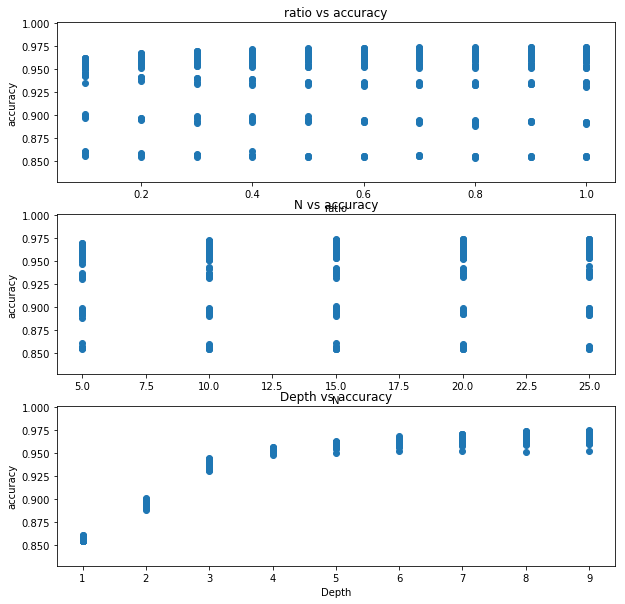

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(311)
ax1.scatter(test_array[:, 1], test_array[:,0])
ax1.set_xlabel('ratio')
ax1.set_ylabel('accuracy')
ax1.set_title('ratio vs accuracy')
ax2 = plt.subplot(312)
ax2.scatter(test_array[:, 2], test_array[:,0])
ax2.set_xlabel('N')
ax2.set_ylabel('accuracy')
ax2.set_title('N vs accuracy')
ax3 = plt.subplot(313)
ax3.scatter(test_array[:, 3], test_array[:,0])
ax3.set_xlabel('Depth')
ax3.set_ylabel('accuracy')
ax3.set_title('Depth vs accuracy')


# Random Decision Tree [10-points]

In this assignment you are going to implement a random decision tree using random vector method as discussed in the lecture.

Best split: One that achieves maximum reduction in gini index across multiple candidate splits. (decided by `candidate_splits` attribute of the class `RandomDecisionTree`)

Use `TreeNode` class as node abstraction to build the tree

You are allowed to add new attributes in the `TreeNode` and `RandomDecisionTree` class - if that helps.

Your tasks are as follows:
* Implement `gini_index` method which takes in class labels as parameter and returns the gini impurity as measure of uncertainty

* Implement `majority` method which picks the most frequent class label. In case of tie return any random class label

* Implement `find_best_split` method which finds the random vector/hyperplane which causes most reduction in the gini index. 

* Implement `build_tree` method which uses `find_best_split` method to get the best random split vector for current set of training points. This vector partitions the training points into two sets, and you should call `build_tree` method on two partitioned sets and build left subtree and right subtree. Use `TreeNode` as abstraction for a node.

> The method calls itself recursively to the generate left and right subtree till the point either `max_depth` is reached or no good random split is found.  When either of two cases is encountered, you should make that node as leaf and identify the label for that leaf to be the most frequent class (use `majority` method). Go through lecture slides for better understanding

* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those using the tree built. (`root` attribute of the class)

## TODO: 
Alter the make_split method to generate a random vector of length X_train.shape[1] with values set between -1 and 1. 
Take the dot product of the split split vector(values between -1 and 1) and the input vector (values between 0 and 1)

As a second implementation, rescale the mnist dataset to take on values between -1 and 1. 

Compare the performance of the methods whith and without the rescaled mnist data. 

In [25]:
import random
class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.isLeaf = False
        self.label = None
        self.split_vector = None

    def getLabel(self):
        if not self.isLeaf:
            raise Exception("Should not to do getLabel on a non-leaf node")
        return self.label
    
class RandomDecisionTree:
            
    def __init__(self, candidate_splits = 100, depth = 10):
        """
        Args:
            candidate_splits (int) : number of random decision splits to test
            depth (int) : maximum depth of the random decision tree
        """
        self.candidate_splits = candidate_splits
        self.depth = depth
        self.root = None
    
    def fit(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
#         print("fitting")
#         print("The type of root at the start is {}".format(type(self.root)))
        self.root = self.build_tree(X_train[:], y_train[:], 0)
#         print("Finished")
#         print("the root is: {}".format(self.root))
        return self
        
    # Given a classification criterion, split the dataset based on that criteria.
    # This takes the difference between the random vector and the datapoint
    def make_split_difference(self, split_vector, X_train, y_train):
        x_left = []
        y_left = []
        x_right = []
        y_right = []
        for xval, yval in zip(X_train, y_train):
#             print("Split Criterion: {}".format(sum(xval - split_vector)))
            if sum(xval - split_vector) > 1:
                y_left.append(yval)
                x_left.append(xval)
            else:
                y_right.append(yval)
                x_right.append(xval)
        return np.array(x_left), np.array(y_left), np.array(x_right), np.array(y_right)
   
    # This one chooses a pivot element from the datapoint.
    def make_split_pivot(self, split_vector, X_train, y_train):
        x_left = []
        y_left = []
        x_right = []
        y_right = []
        for xval, yval in zip(X_train, y_train):
#             print("Make Split xval shape: {}".format(xval.shape))
#             print("Split element is : {}".format(split_vector))
            if split_vector is None:
                print("split vector is None again...")
            if xval[split_vector] > 0.3:
                y_left.append(yval)
                x_left.append(xval)
            else:
                y_right.append(yval)
                x_right.append(xval)
        return np.array(x_left), np.array(y_left), np.array(x_right), np.array(y_right)
        
    def make_split(self, split_vector, X_train, y_train):
        x_left = []
        y_left = []
        x_right = []
        y_right = []
        for xval, yval in zip(X_train, y_train):
#             print("Make Split xval shape: {}".format(xval.shape))
#             print("Split element is : {}".format(split_vector))
            if split_vector is None:
                print("split vector is None again...")
            if np.dot(xval, split_vector) > 0:
                y_left.append(yval)
                x_left.append(xval)
            else:
                y_right.append(yval)
                x_right.append(xval)
        return np.array(x_left), np.array(y_left), np.array(x_right), np.array(y_right)

        
        
    def build_tree(self, X_train, y_train, height):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        
        '''
        if the data set is "pure" or the dataset the height/candidate split conditions are met, 
        return the leaf node
        '''
        # set our termination condition.
        node = TreeNode()
#         if self.gini_index(y_train) == 0 or self.candidate_splits == 0 or height == self.depth:
        if self.gini_index(y_train) == 0 or height == self.depth:
#             print("I hit a leaf!")
            node.label = self.majority(y_train)
#             print("The leaf class is {}".format(node.label))
            node.isLeaf = True
            return node
        # increment some terminating conditions.
        height += 1
#         self.candidate_splits -= 1
        # Given a dataset, split it into left and right nodes based off a decision boundary.
        split_vector = self.find_best_split(X_train, y_train)
        # if split vector is none, then the node is a leaf. 
        if split_vector is None:
            node.isLeaf = True
            node.label = self.majority(y_train)
            return node
        
        x_left, y_left, x_right, y_right = self.make_split(split_vector, X_train, y_train)
        node.split_vector = split_vector
        
#         print("x_left shape = {}".format(x_left.shape))
#         print("x_right shape = {}".format(x_right.shape))
        # Recursion happens here
        node.left = self.build_tree(x_left, y_left, height)
        node.right = self.build_tree(x_right, y_right, height)
        if node.left is None and node.right is None:
#             node.isLeaf = True
            node.label = self.majority(y_train)
        return node
        
    def find_best_split(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
#         print("finding the best split vector")
        split_vector = None 
        # your logic here
        # generate 20 random split vectors and compute the gini score of each split. Return the vector with the lowest score
        gini_idx = 1
        i = 0
        while i <= self.candidate_splits:
            i += 1
            if i > self.candidate_splits and split_vector is None:
                return None
#         for i in range(50):
#             print("Comparing Vector {}".format(i+1))
#             print(X_train.shape)
            #tmp_split = np.random.rand(1, X_train.shape[1])[0]
            # Incrementally create a list of random indices. If the value of the data entry at the index is greater 
            # than 0.3, go left. Otherwise go right.
#             tmp_split = np.random.randint(0, X_train.shape[1])
            if type(X_train) is list:
                X_train = np.array(X_train)
            tmp_split = np.random.uniform(-1, 1, size=(1, X_train.shape[1]))[0]
        
            y_left = []
            y_right = []
            
            x_left, y_left, x_right, y_right = self.make_split(tmp_split, X_train, y_train)
            # If we get a split vector which creates an empty array, the split vector becomes invalid
            # This condition will also cover the case where the decision index has already been selected 
            # because a previoius decision index will result in a split of all and nothing
#             for xval, yval in zip(X_train, y_train):
#                 if sum(xval - tmp_split) > 1:
#                     y_left.append(yval)
#                 else:
#                     y_right.append(yval)
            # Compute the gini index:
#             print("Length of the left array: {}".format(len(y_left)))
#             print("Length of the right array: {}".format(len(y_right)))
            gini_idx_left = self.gini_index(y_left)
            gini_idx_right = self.gini_index(y_right)
#             if the gini index is less than the current min, we have a good split vector.
            if gini_idx_left < gini_idx:
                gini_idx = gini_idx_left
                split_vector = tmp_split
            if gini_idx_right < gini_idx:
                gini_idx = gini_idx_right
                split_vector = tmp_split
        return split_vector
            
    def gini_index(self, y):
        """
        Args:
            y (ndarray): [n_samples] ndarray of data
        """
        # The gini index is defined to be 1 - the sum of the squares of the probability of getting each class.
        # Get the frequency of each class label.
#         print("computing the gini index")
        prob_sum = 0
        counter = Counter(y)
        for key in counter.keys():
            prob = counter.get(key) / len(y)
            prob_sum = prob_sum + prob**2
        return 1 - prob_sum
            
    def majority(self, y):
        """
        Return the major class in ndarray y
        """
        counter = Counter(y)
        sorted_frequencies = counter.most_common()
        # If there is a tie, return a random element.
        if len(sorted_frequencies) > 1 and sorted_frequencies[0][1] == sorted_frequencies[1][1]:
            return random.choice(list(counter.keys()))
        else:
            return sorted_frequencies[0][0]
    
    def traverse_tree(self, xval, node):
#         print("X: {}".format(xval.shape))
#         print("the decision boundary is {}".format(xval[node.split_vector]))
#         print("The node's label is: {}".format(node.label))
        if node.isLeaf:
#             print("isleaf? {}".format(node.isLeaf))
#             print("has left child? {}".format(node.left))
#             print("has right child? {}".format(node.right))
#             print("has label? {}".format(node.label))
#             print("the split vector element is {}".format(node.split_vector))
#             print("***************************************************************")
            return node.label
        elif np.dot(xval, node.split_vector)>0 and node.left is not None:
#             print("traversing left")
#             print("isleaf? {}".format(node.isLeaf))
#             print("has left child? {}".format(node.left))
#             print("has right child? {}".format(node.right))
#             print("has label? {}".format(node.label))
#             print("the split vector element is {}".format(node.split_vector))
#             print("***************************************************************")
            return self.traverse_tree(xval, node.left)
        elif np.dot(xval, node.split_vector)<=0 and node.right is not None:
#             print("Traversing right")
#             print("isleaf? {}".format(node.isLeaf))
#             print("has left child? {}".format(node.left))
#             print("has right child? {}".format(node.right))
#             print("has label? {}".format(node.label))
#             print("the split vector element is {}".format(node.split_vector))
#             print("***************************************************************")

            return self.traverse_tree(xval, node.right)
        else:
            print("We found an edge case:")
#             print("isleaf? {}".format(node.isLeaf))
#             print("has left child? {}".format(node.left))
#             print("has right child? {}".format(node.right))
#             print("has label? {}".format(node.label))
#             print("the split vector element is {}".format(node.split_vector))
#             print("***************************************************************")

#         return node.label
            
    
    def predict(self, X):
        """
        BaggingClassifier prediction for new data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        yhat = []
        for xval in X:
            # Traverse the tree based on the results of applying the split vector to the xval
            label =self.traverse_tree(xval, self.root)
#             print("Result label of traversal is: {}".format(label))
            yhat.append(label)
        return yhat

## RandomDecisionTree for Handwritten Digit Recognition

After you've successfully completed `RandomDecisionTree`, and train using the default values in the constructor and report accuracy on the test set. Use the data from `ThreesAndEights` class initialized variable `data` 

In [27]:
decision_tree = RandomDecisionTree()
trained_tree = decision_tree.fit(data.X_train, data.y_train)

In [28]:
results = trained_tree.predict(data.X_valid)

In [29]:
correct = 0
incorrect = 0
for i in range(len(results)):
    if data.y_valid[i] == results[i]:
        correct += 1
    else:
        incorrect += 1
print("Accuracy is {}%".format(correct / (correct + incorrect)))

Accuracy is 0.7194703285924473%


# Random Forest [5-points]
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Random forest trains random decision trees on bootstrapped training points. Thus, you can implementation of methods (`bootstrap`, `predict`) from `BaggingClassifier` class directly. Only difference being, you have to use the `RandomDecisionTree` as base which you implemented previously instead of sklearn's implementation of `DecisionTreeClassifier`). Implement the `fit` method in the class below accordingly.

In [26]:
class RandomForest(BaggingClassifier):
    def __init__(self, ratio = 0.20, N = 20, max_depth = 10, candidate_splits = 100):
        self.ratio = ratio
        self.N = N
        self.learners = []
        self.candidate_splits = candidate_splits
        self.max_depth = max_depth
        super().__init__(ratio=self.ratio,
                         N = self.N,
                         base=RandomDecisionTree(candidate_splits=self.candidate_splits, depth=self.max_depth))
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        super().fit(X_train, y_train)
        

In [10]:
test_forest = RandomForest()

In [11]:
test_forest.fit(data.X_train, data.y_train)

In [12]:
predictions = test_forest.predict(data.X_valid)
results = test_forest.voting(predictions)
test_forest.accuracy(results, data.y_valid)

0.8666012751348701

## RandomForest for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `RandomForest` find the optimal values of `ratio`, `N`, `candidate_splits` and `depth` using k-fold cross validation on. Feel free to use sklearn library to split your training data. Use the data from `ThreesAndEights` class intialized variable `data`. 

Justify why those values are optimal.

Report best accuracy on the testing data using those optimal parameter values.

In [19]:
import multiprocessing
data_permutations = []
for ratio in np.arange(0.5, 1.5, 0.5):# two values
    for N in range(10, 40, 10): #  3 values
        for depth in range(5, 15, 5): # 2 values
            for num_splits in range(50, 200, 50): # 3 values
                data_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})

In [20]:
len(data_permutations)

36

In [17]:
import multiprocessing
data_permutations = []
for ratio in np.arange(0.1, 1.1, 0.1): 
    for N in range(5, 30, 5):
        for depth in range(1, 10):
            for num_splits in range(20, 200, 10):
                data_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})

In [21]:
# K fold cross validation will split all of the training data into k folds (I will use 10)
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [24]:
def cross_validation(args):
    ratio = args['ratio']
    N = args['N']
    depth = args['depth']
    num_splits = args['num_splits']
    print(args)
    scores = []
#     print(args)
    for train, test in kfold.split(X=data.X_train):
        # kfold.split returns the indices into the original datasets
        # Create the k-fold datasets from the split indices
        X_train = [data.X_train[idx] for idx in train]
        y_train = [data.y_train[idx] for idx in train]
        X_test = [data.X_train[idx] for idx in test]
        y_test = [data.y_train[idx] for idx in test]
        # Create a new bag classifier, and get the accuracy 
        forest = RandomForest(N=N, ratio=ratio, max_depth = depth, candidate_splits=num_splits)
        forest.fit(X_train, y_train)
        predictions = forest.predict(X_test)
        results = forest.voting(predictions)
        score = forest.accuracy(results, y_test)
        scores.append(score)
#     print([np.mean(scores), ratio, N, depth, num_splits])
    return [np.mean(scores), ratio, N, depth, num_splits]


In [25]:
results = []
pool = multiprocessing.Pool()
results = pool.map(cross_validation, data_permutations)

{'ratio': 0.5, 'N': 10, 'depth': 10, 'num_splits': 100}
{'ratio': 0.5, 'N': 10, 'depth': 5, 'num_splits': 150}
{'ratio': 0.5, 'N': 20, 'depth': 10, 'num_splits': 100}
{'ratio': 0.5, 'N': 30, 'depth': 5, 'num_splits': 150}
{'ratio': 0.5, 'N': 30, 'depth': 5, 'num_splits': 50}
{'ratio': 0.5, 'N': 20, 'depth': 5, 'num_splits': 50}
{'ratio': 0.5, 'N': 20, 'depth': 5, 'num_splits': 150}
{'ratio': 0.5, 'N': 10, 'depth': 5, 'num_splits': 50}
{'ratio': 0.5, 'N': 10, 'depth': 5, 'num_splits': 100}
{'ratio': 0.5, 'N': 20, 'depth': 5, 'num_splits': 100}
{'ratio': 0.5, 'N': 10, 'depth': 10, 'num_splits': 50}
{'ratio': 0.5, 'N': 30, 'depth': 10, 'num_splits': 100}
{'ratio': 0.5, 'N': 30, 'depth': 5, 'num_splits': 100}
{'ratio': 0.5, 'N': 10, 'depth': 10, 'num_splits': 150}
{'ratio': 1.0, 'N': 10, 'depth': 5, 'num_splits': 50}
{'ratio': 0.5, 'N': 20, 'depth': 10, 'num_splits': 50}
{'ratio': 1.0, 'N': 10, 'depth': 5, 'num_splits': 150}
{'ratio': 1.0, 'N': 10, 'depth': 5, 'num_splits': 100}
{'ratio': 

In [26]:
print(results)

[[0.8186668756256129, 0.5, 10, 5, 50], [0.7920077247404024, 0.5, 10, 5, 100], [0.7506821835535828, 0.5, 10, 5, 150], [0.8864474282883229, 0.5, 10, 10, 50], [0.8560783798266989, 0.5, 10, 10, 100], [0.8633168862420757, 0.5, 10, 10, 150], [0.83224148913582, 0.5, 20, 5, 50], [0.8459262105295087, 0.5, 20, 5, 100], [0.7891228779713456, 0.5, 20, 5, 150], [0.8952015611255473, 0.5, 20, 10, 50], [0.8816215888294592, 0.5, 20, 10, 100], [0.8161648281649697, 0.5, 20, 10, 150], [0.8687569638939163, 0.5, 30, 5, 50], [0.8033803827993085, 0.5, 30, 5, 100], [0.7907230316572804, 0.5, 30, 5, 150], [0.9160203431645147, 0.5, 30, 10, 50], [0.8996295360100299, 0.5, 30, 10, 100], [0.8556878962215503, 0.5, 30, 10, 150], [0.8242884442332385, 1.0, 10, 5, 50], [0.8154510985511056, 1.0, 10, 5, 100], [0.7583273510409188, 1.0, 10, 5, 150], [0.8909784334145577, 1.0, 10, 10, 50], [0.8573937089875938, 1.0, 10, 10, 100], [0.8611050220923531, 1.0, 10, 10, 150], [0.8739736913945988, 1.0, 20, 5, 50], [0.8558786892207516, 1.

In [27]:
with open("asdf.pkl", 'wb') as dumpfile:
    pickle.dump(results, dumpfile)

In [1]:
import pickle as pkl
with open("k_fold_forest.pkl", 'rb') as infile:
    results = pkl.load(infile)

In [3]:
sorted_results = sorted(results, key=lambda x: x[0], reverse=True)

In [4]:
sorted_results

[[0.9160203431645147, 0.5, 30, 10, 50],
 [0.9142085679908597, 1.0, 30, 10, 50],
 [0.9100855383557628, 1.0, 20, 10, 50],
 [0.9039543795435933, 1.0, 30, 10, 100],
 [0.8996295360100299, 0.5, 30, 10, 100],
 [0.8977127084112716, 1.0, 20, 10, 100],
 [0.8959056853684922, 1.0, 30, 5, 50],
 [0.8952015611255473, 0.5, 20, 10, 50],
 [0.8909784334145577, 1.0, 10, 10, 50],
 [0.8864474282883229, 0.5, 10, 10, 50],
 [0.8825313691192381, 1.0, 30, 10, 150],
 [0.8816215888294592, 0.5, 20, 10, 100],
 [0.8739736913945988, 1.0, 20, 5, 50],
 [0.8687569638939163, 0.5, 30, 5, 50],
 [0.8633168862420757, 0.5, 10, 10, 150],
 [0.8611050220923531, 1.0, 10, 10, 150],
 [0.8573937089875938, 1.0, 10, 10, 100],
 [0.8560783798266989, 0.5, 10, 10, 100],
 [0.8558786892207516, 1.0, 20, 5, 100],
 [0.8556878962215503, 0.5, 30, 10, 150],
 [0.8459262105295087, 0.5, 20, 5, 100],
 [0.8446095669494353, 1.0, 30, 5, 100],
 [0.8421020595937435, 1.0, 20, 10, 150],
 [0.83224148913582, 0.5, 20, 5, 50],
 [0.8242884442332385, 1.0, 10, 5, 5

This initial permutation set took over a day to run, and so I unfortunately dont have time or compute resources to be as thorough as I would like. However, this results give me insight as to how to proceed.

In [28]:
import multiprocessing

In [27]:
# I have an 8 thread laptop, so each set can have 8 permutations if running in parallel
# Optimal splits were on the low end. Test 10, 30, 50
splits_permutations = []
N = 30 
depth = 10
num_splits = 50
ratio = 0.75
for num_splits in [15,20,25,30,35,40,45, 50]:
    splits_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})
# Optimal N was on the high end. Test 30, 40, 50
N_permutations = []
N = 30 
depth = 10
num_splits = 50
ratio = 0.75
for N in [30,35, 40,45, 50, 55, 60, 65]:
    N_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})
    
# Optimal depth was on the high end. Test 20, 30, 40
depth_permutations = []
N = 30 
depth = 10
num_splits = 50
ratio = 0.75
for depth in [10,15, 20,25, 30,35, 40, 45]:
    depth_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})
    

# Optimal ratio was mixed. Test 0.5, 0.75, 0.9
ratio_permutations = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
N = 30 
depth = 10
num_splits = 50
ratio = 0.75
for ratio in [0.5, 0.]:
    ratio_permutations.append({'ratio':ratio, 'N':N, 'depth':depth, 'num_splits':num_splits})
    

In [29]:
# K fold cross validation will split all of the training data into k folds 
# In the interest of time, I am reducing K to be 5 from 10 as done in the previous set.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
kfold = KFold(n_splits=5, random_state=1, shuffle=True)

In [30]:
def cross_validation(args):
    ratio = args['ratio']
    N = args['N']
    depth = args['depth']
    num_splits = args['num_splits']
    print(args)
    scores = []
#     print(args)
    for train, test in kfold.split(X=data.X_train):
        # kfold.split returns the indices into the original datasets
        # Create the k-fold datasets from the split indices
        X_train = [data.X_train[idx] for idx in train]
        y_train = [data.y_train[idx] for idx in train]
        X_test = [data.X_train[idx] for idx in test]
        y_test = [data.y_train[idx] for idx in test]
        # Create a new bag classifier, and get the accuracy 
        forest = RandomForest(N=N, ratio=ratio, max_depth = depth, candidate_splits=num_splits)
        forest.fit(X_train, y_train)
        predictions = forest.predict(X_test)
        results = forest.voting(predictions)
        score = forest.accuracy(results, y_test)
        scores.append(score)
#     print([np.mean(scores), ratio, N, depth, num_splits])
    return [np.mean(scores), ratio, N, depth, num_splits]


In [31]:
splits_results = []
ratio_results = []
N_results = []
depth_results = []

pool = multiprocessing.Pool()
# print("Testing Splits")
# splits_results = pool.map(cross_validation, splits_permutations)
# print("Testing Depth")
# depth_results = pool.map(cross_validation, depth_permutations)
# print("Testing ratio")
# ratio_results = pool.map(cross_validation, ratio_permutations)
print("Testing N")
N_results = pool.map(cross_validation, N_permutations)

{'ratio': 0.75, 'N': 35, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 40, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 45, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 30, 'depth': 10, 'num_splits': 50}
Testing N
{'ratio': 0.75, 'N': 50, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 55, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 60, 'depth': 10, 'num_splits': 50}
{'ratio': 0.75, 'N': 65, 'depth': 10, 'num_splits': 50}


Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  F

KeyboardInterrupt: 

  File "<ipython-input-25-d1e4e9972042>", line 136, in build_tree
    node.right = self.build_tree(x_right, y_right, height)
  File "<ipython-input-30-0e315fd5eeab>", line 18, in cross_validation
    forest.fit(X_train, y_train)
  File "<ipython-input-24-065e2cadd6f4>", line 42, in fit
    h.fit(D_x, D_y)
  File "<ipython-input-30-0e315fd5eeab>", line 18, in cross_validation
    forest.fit(X_train, y_train)
  File "<ipython-input-25-d1e4e9972042>", line 36, in fit
    self.root = self.build_tree(X_train[:], y_train[:], 0)
  File "<ipython-input-25-d1e4e9972042>", line 136, in build_tree
    node.right = self.build_tree(x_right, y_right, height)
  File "<ipython-input-26-8a6ce00e8a10>", line 20, in fit
    super().fit(X_train, y_train)
  File "<ipython-input-26-8a6ce00e8a10>", line 20, in fit
    super().fit(X_train, y_train)
  File "<ipython-input-25-d1e4e9972042>", line 122, in build_tree
    split_vector = self.find_best_split(X_train, y_train)
  File "<ipython-input-25-d1e4e9972042>

In [32]:
# Ran these tests on another computer so i have to load them, but the code that ran them is in the cells above

In [35]:
splits_results = [[0.917630685166241, 0.75, 30, 10, 15],
[0.9192398776944897, 0.75, 30, 10, 20],
[0.911496696932312, 0.75, 30, 10, 25],
[0.9097858892922475, 0.75, 30, 10, 30],
[0.9143121213254091, 0.75, 30, 10, 35],
[0.9148144718045275, 0.75, 30, 10, 40],
[0.9129047631532397, 0.75, 30, 10, 45],
[0.9208496164317805, 0.75, 30, 10, 50]]

In [36]:
depth_results = [[0.8956027623126442, 0.75, 30, 10, 50],
[0.9287936402817759, 0.75, 30, 15, 50],
[0.9335218482807686, 0.75, 30, 20, 50],
[0.9371425061818726, 0.75, 30, 25, 50],
[0.9428743631809466, 0.75, 30, 30, 50],
[0.9414672275383872, 0.75, 30, 35, 50],
[0.9467969533026064, 0.75, 30, 40, 50],
[0.9533340438096876, 0.75, 30, 45, 50]]

In [37]:
ratio_results = [[0.9137086817135525, 0.5, 30, 10, 50],
[0.901337795416149, 0.55, 30, 10, 50],
[0.9063651439005929, 0.6, 30, 10, 50],
[0.9070713921921724, 0.65, 30, 10, 50],
[0.9027458414071121, 0.7, 30, 10, 50],
[0.9190391155265301, 0.75, 30, 10, 50],
[0.9000314454568599, 0.8, 30, 10, 50],
[0.9102901818479603, 0.85, 30, 10, 50]]

In [38]:
N_results = [[0.9208496164317805, 0.75, 30, 10, 50],
[0.9084781030054768, 0.75, 35, 10, 50],
[0.9179326983066549, 0.75, 40, 10, 50],
[0.9027450322085311, 0.75, 45, 10, 50],
[0.9160217960874601, 0.75, 50, 10, 50],
[0.9190390750666011, 0.75, 55, 10, 50],
[0.9238669763307796, 0.75, 60, 10, 50],
[0.923162488046114, 0.75, 65, 10, 50]]

In [44]:
split_sorted = sorted(splits_results, key=lambda x: x[0])
split_sorted

[[0.9097858892922475, 0.75, 30, 10, 30],
 [0.911496696932312, 0.75, 30, 10, 25],
 [0.9129047631532397, 0.75, 30, 10, 45],
 [0.9143121213254091, 0.75, 30, 10, 35],
 [0.9148144718045275, 0.75, 30, 10, 40],
 [0.917630685166241, 0.75, 30, 10, 15],
 [0.9192398776944897, 0.75, 30, 10, 20],
 [0.9208496164317805, 0.75, 30, 10, 50]]

In [45]:
ratio_sorted = sorted(ratio_results, key=lambda x: x[0])
ratio_sorted

[[0.9000314454568599, 0.8, 30, 10, 50],
 [0.901337795416149, 0.55, 30, 10, 50],
 [0.9027458414071121, 0.7, 30, 10, 50],
 [0.9063651439005929, 0.6, 30, 10, 50],
 [0.9070713921921724, 0.65, 30, 10, 50],
 [0.9102901818479603, 0.85, 30, 10, 50],
 [0.9137086817135525, 0.5, 30, 10, 50],
 [0.9190391155265301, 0.75, 30, 10, 50]]

In [46]:
N_sorted = sorted(N_results, key=lambda x: x[0])
N_sorted

[[0.9027450322085311, 0.75, 45, 10, 50],
 [0.9084781030054768, 0.75, 35, 10, 50],
 [0.9160217960874601, 0.75, 50, 10, 50],
 [0.9179326983066549, 0.75, 40, 10, 50],
 [0.9190390750666011, 0.75, 55, 10, 50],
 [0.9208496164317805, 0.75, 30, 10, 50],
 [0.923162488046114, 0.75, 65, 10, 50],
 [0.9238669763307796, 0.75, 60, 10, 50]]

In [47]:
depth_sorted = sorted(depth_results, key=lambda x: x[0])
depth_sorted

[[0.8956027623126442, 0.75, 30, 10, 50],
 [0.9287936402817759, 0.75, 30, 15, 50],
 [0.9335218482807686, 0.75, 30, 20, 50],
 [0.9371425061818726, 0.75, 30, 25, 50],
 [0.9414672275383872, 0.75, 30, 35, 50],
 [0.9428743631809466, 0.75, 30, 30, 50],
 [0.9467969533026064, 0.75, 30, 40, 50],
 [0.9533340438096876, 0.75, 30, 45, 50]]

The results of this second level k-fold cross validation shows that the optimal values are as follows:

depth = 45

ratio = 0.75

N = 60

num_splits = 50

While this implementation works, in reality, the split vector and dataset should reside within the same space. Specifically, each element of our split vector resides in the realm of [-1, 1] while the mnist dataset resides in the realm of [0, 1]. 
The reason that this algorithm still works is that the realm of the decision vector fully encompasses the realm of the dataset. If this were not the case, we would not be able to classify our mnist images. 

Unfortunately, I ran out of time and was not able to test this with my available compute resources.